<a href="https://colab.research.google.com/github/Daprosero/Deep-Convolutional-Generative-Adversarial-Network/blob/master/sistema_de_visi%C3%B3n_por_computador_basado_en_aprendizaje_profundo_para_la_detecci%C3%B3n_de_objetos_sobre_im%C3%A1genes_y_video_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#sistema de visión por computador basado en aprendizaje profundo para la detección de objetos sobre imágenes y video.

Autor: Diego Armando Pérez Rosero

> Codigo: 0816046



# Objetivo
Desarrollar un sistema  de visión por computador basado en aprendizaje profundo para la detección de objetos sobre imágenes y videos a partir de la codificación de patrones espacio temporales no estacionarios relevantes

La propuesta que se tiene para el cumplimiento del enfoque mencionado con anterioridad es la utilización de una red de agrupamiento generativa antagónica(ClusterGAN). Este tipo red emplea el juego de los adversarios y les introduce una tarea adicional para realizar el agrupamiento de datos en Clúster.

Antes de proceder a la implementación de una ClusterGAN explicaremos el funcionamiento de un Red generativa antagónica y una red variante concocida como Red generativa antagónica condicionada(CGAN). El proposito de estos dos modelos adicionales es mostrar el funcionamiento de las GANS y asícomprender como se utilizarán para la clusterización de datos.

#Generative Adversarial Networks (GAN)
Las GANs es una arquitectura de red neuronal capaz de convertir datos basuras(Ruido) en información relevante(conocimiento). Las GANs utiliza la naturaleza de los adversarios que consiste en implementar un modelo generativo para que compita con un modelo no generativo(Discriminador) para poder lograr objetivos idividuales. Se puede ver este enfrentamiento como el juego de policias y ladrones. los ladrones buscan falsificar dinero cada vez más párecido al real( generador) y los policias de detectar el dinero falso(discriminador).Este modelo llega a un punto en el que es indistinguible el dinero real del falso(50/50) y por ende se puede utilizar las GANs como generadora de datos o detección de datos falsos.\
La estructura general de las GANs es la siguiente:
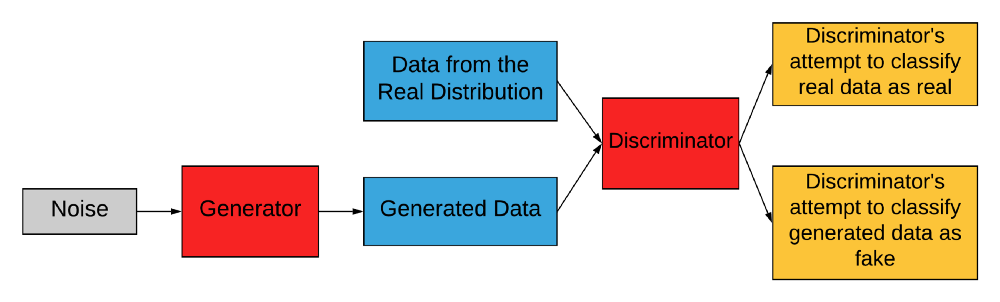
## Ruido
Es la distribución aleatoria que se busca transformar a una distribución deseada, es decir, Las GANs asignan una función estadistica de una distribución a otra.

## Datos de la distribución real
Es la distribución real o deseada, es el objetivo final de las GANs  a la hora de transformar el ruido. En el ejemplo del juego de policias y ladrones este es el conjunto de datos de dinero real con el cual se entrena el modelo.

## Discriminador
El proposito del discriminador es el de clasificar los datos como reales o falsas, en pocas palabras, el discriminador tiene las siguientes funciones.
* Clasificar correctamente los datos reales como reales.
* Clasificar correctamente los datos falsos como falsos.

Podemos ver el discriminador como una métrica de evaluación entrenable que nos indica la calidad del generador. 

## Generador
El generador por medio de una red generativa intenta buscar las tendencias de los datos reales y generar nuevos datos pertencientes a la distribución real. Debido a que este es el apartado principal de las GANs debe penalizarce fuertemente cada vez que los datos generados se encuentren lejos de los reales y más suavemente cuando estos datos nuevos se encuentren cerca de los reales. Se minimiza la penalización a medida que el generador engañe al discriminador.

## Entrenamiento
Por términos de convergencia el entrenamiento del generador y discrminador se deben hacer por separado. Se entrena el discriminador por varias epocas y después el generador, esta secuencia continua de un lado a otro hasta llegar al objetivo. Pero, lo que se quiere es realizar el proceso lo más óptimo posible, es por esto que por cada k pasos óptimos del discriminador se da un paso óptimo en el generador. 
## Función de costo
\begin{equation}
 _{G}^{Min}\rightleftharpoons_{D}^{Max}= E_{x\sim PData(x)}log(D(x))+E_{z\sim P_{z}(z)}log(1-D(G(z))) 
\end{equation}
En donde:
* D(x): Estimación discriminadora de la probabilidad de que la instancia `x` sea real.
* $E_{x}$: Valor esperado sobre todas las instancias de los datos reales.
* G(z): Salida del generador cuando se le da un ruido `z`
* D(G(z)): Estimación discriminadora de la probabilidad de que una instancia falsa `G(z)` sea real.
* $E_{z}$ valor esperado sobre todas las entradas aleatorias al generador, En efecto, es el valor esperado sobre todas las instansias falsas generadas G(z).


Esta perdida se conoce como la pérdida Minmax, en donde el generador busca minimizar y el discrimizar busca maximizar la función. En muchas ocaciones se puede modificar esta función para que ocurra lo contrario, es decir, el generador maximice la función y el discriminador la minimice. Esta última modificación se hace debido a que en las primera epocas el discriminador facilmente clasifica los datos reales de los falsos saturando la función de costo, como resultado se tendrá un modelo mas robusto al inicio del entrenamiento y mas flexible al final.

## Deep Convolutional Generative Adversarial Networks (DCGAN)
los DCGAN son la "versión" de las GANs para imagenes. Esta estructura utiliza principalmente las redes neuronales profundas para generar imagenes a partir del ruido, lo que quiere decir  que esta versión utiliza una red generadora para crear nuevos datos y una red discriminatoria para evaluar el rendimiento del generador. 

### Generador
El generador se basa principalmente en capas convolucionales transpuestas que da como resultado el proceso inverso de las capas convolucionales. Esta sección se encargada de desconvolucioanr el ruido y llevarlo a la distribución deseada. Un ejemplo de este proceso es aplicar un kernel 3x3 sobre una imagen 2x2 con bordes de cero 2x2 (imagen 6x6) y extraer una imagen 4x4

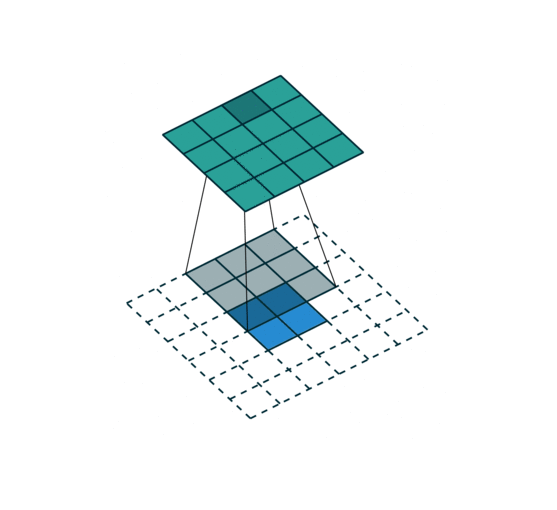

### Discriminador 
El discriminador es simplemente un clasificador binario compuesto por capas convolucionales. La salida de estas capas convolucionales es una salida con la probabilidad de que la imagen sea real o falsa.

### Perdida
Definiremos la perdida como la penalización debido a la equivocación en el funcionamiento de alguno de los dos modelos. En el caso del generador la penalización ocurre cuando el discriminador clasifica las imagenes generadas como falsas. De forma contraria el discriminador debe predecir las salidas y clasificarlas de manera correcta, lo que se traduce en clasificar las imagenes falsas como falsas y las reales como reales, de lo contrario este modelo será penalizado.


## Implementación
Para poder realizar la implemntación de una DCGAN se buscaron las bases de datos más utilizadas en Machine Learning debido a su amplia literatura. Estos conjuntos de datos son MNIST y CIFAR-10.

En la seguiente sección se realizará un ejemplo detallado utilizando la base de datos MNIST, esto con el objetivo de explicar y afianzar los conociminetos observados en la sección anteriror.


### MNIST
La MNIST (Modified National Institute of Standards and Technology database) es una base de datos de diígitos escritos a mano. Esta base de datos consta de 60.000 muetras para entrenamiento y 10.000 para evaluación

En la siguiente celda se  importarán la base de datos correspondiente y se instalará todas las librerias requeridas en el documento.

In [1]:
from numpy import expand_dims
from numpy import zeros
from numpy import ones
from numpy import vstack
from numpy.random import randn
from numpy.random import randint
import tensorflow as tf
from keras.optimizers import Adam,Adamax
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Dropout
%matplotlib inline
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import time
from IPython import display
from matplotlib import pyplot
from keras.layers import Activation, BatchNormalization, Concatenate, Dense,Embedding, Flatten, Input, Multiply, Reshape,AveragePooling2D,Dropout,MaxPooling2D,LeakyReLU
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.models import Model, Sequential

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Debido a que la base de datos posee valores entre 0 y 255 es necesario realizar un normalizado para que su rango se encuentre entre $[-1 ,1]$.

En la siguiente celda se inicializan todos los parámetros requeridos para el funcionamiento de la red. Dentro de estas se recalca la variable `seed` la cual fija un ruido aleatorio con un número determinado de muestras, permitiendo de esta manera mostrar los avances de la red generadora epoca por epoca.

In [ ]:
(train, _), (_, _) = tf.keras.datasets.mnist.load_data()
train = train.reshape(train.shape[0], 28, 28, 1)
X=train.astype('float32')
dataset=(X-127.5)/127.5
noise_dim=100
in_shape=(28,28,1)
Num_Example=25
seed=tf.random.normal([Num_Example, noise_dim]) 
n_epochs=100
n_batch=64

Esta función se encarga de entregar un número de muetras aleatorias provenientes de la base de datos y un arreglo de unos correspondietes a su clasificación real(Datos reales).

In [ ]:
def generate_real_samples(dataset, n_samples):
    ix = randint(0, dataset.shape[0], n_samples)
    X = dataset[ix]
    y = ones((n_samples, 1))
    return X, y

Esta sección nos entrega un número aleatorio de datos falsos poroducidos por el generador y un arreglo de ceros correspondiente a su clasificación real (Datos falsos)

In [ ]:
def generate_fake_samples(g_model, latent_dim, n_samples):
    x_input = generate_latent_points(latent_dim, n_samples)
    X = g_model.predict(x_input)
    y = zeros((n_samples, 1))
    return X, y

En esta apartado se genera el ruido necesario para la generación de imagenes. Este ruido posee el tamaño de (n_samples,noise_dim).

In [ ]:
def generate_latent_points(latent_dim, n_samples):
    x_input = randn(latent_dim * n_samples)
    x_input = x_input.reshape(n_samples, latent_dim)
    return x_input

#### Generador
Esta red es la encargada de recibir un ruido aleatorio y convertirlo en una imagen de 28x28x1. Debido a que los datos deseados oscilan entre `[-1,1]` se debe garantizar que los datos generados no sobresalgan este rango, es por esto que la última capa del modelo lleva una activación `tanh` . El modelo encargado de realziar este proceso es el siguiente

In [ ]:
def define_generator():
	model = Sequential()
	n_nodes = 512 * 7 * 7
	model.add(Dense(n_nodes, input_dim=noise_dim))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Reshape((7, 7, 512)))
 
	model.add(Conv2DTranspose(256, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
 
	model.add(Conv2DTranspose(256, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
 
	model.add(Conv2D(1, (7,7), activation='tanh', padding='same'))
	return model
g_model=define_generator()
g_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 25088)             2533888   
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 25088)             0         
_________________________________________________________________
reshape (Reshape)            (None, 7, 7, 512)         0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 256)       2097408   
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 14, 14, 256)       0         
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 28, 28, 256)       1048832   
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 28, 28, 256)      

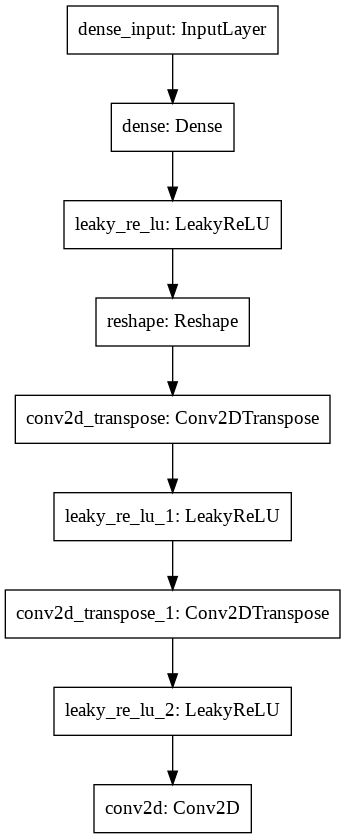

In [ ]:
tf.keras.utils.plot_model(g_model)

#### Discriminador
Esta red recibe una imagen de (28,28,1) y devuelve como salida un valor correspondiente a su clasificación, es decir, esta red nos dice por medio de una capa densa con activación sigmoid si la imagen de entrada es falsa(`0`) o real(`1`).

La arquitectura y el modelo se observan a continuación 

In [ ]:
def define_discriminator():
	model = Sequential()
	model.add(Conv2D(64, (4,4),strides=(2,2), padding='same', input_shape=in_shape))
	model.add(LeakyReLU(alpha=0.2))
 
	model.add(Conv2D(256, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
 
	model.add(Conv2D(512, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
 
	model.add(Flatten())
	model.add(Dropout(0.4))
 
	model.add(Dense(1, activation='sigmoid'))
 
	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
	return model
d_model=define_discriminator()
d_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 14, 14, 64)        1088      
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 256)         262400    
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 7, 7, 256)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 512)         2097664   
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 4, 4, 512)         0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)             

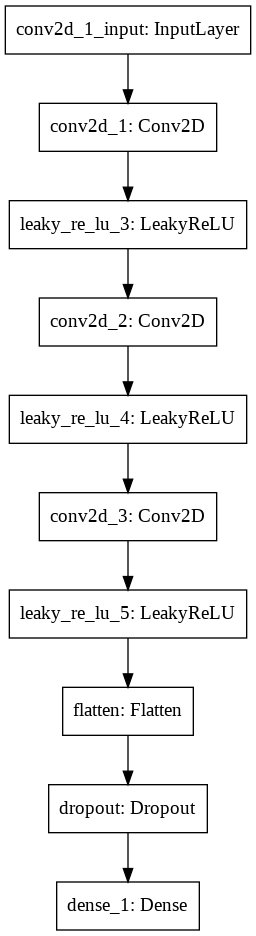

In [ ]:
tf.keras.utils.plot_model(d_model)

#### GAN
La función `def define_gan()` se encarga de combinar los modelos anteriores de tal manera que el generador se entrene cada vez que el  discriminador clasifique los datos generados como falsos. Cabe resaltar que este modelo utiliza pero no entrena al clasificador.


In [ ]:
def define_gan():
	d_model.trainable = False
	model = Sequential()
	model.add(g_model)
	model.add(d_model)
	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt,metrics=['accuracy'])
	return model
gan_model=define_gan()
gan_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 28, 28, 1)         5692673   
_________________________________________________________________
sequential_1 (Sequential)    (None, 1)                 2369345   
Total params: 8,062,018
Trainable params: 5,692,673
Non-trainable params: 2,369,345
_________________________________________________________________


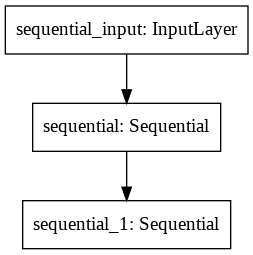

In [ ]:
tf.keras.utils.plot_model(gan_model)

#### Función de entrenamiento
A continuación se define la función encargada del entrenamiento de la red GAN.

En esta función se entrena al discrimiandor en dos partes, una con imagenes falsas y otra con imagenes reales. El tamaño de las muestras  en cada caso es de `half_batch` el cual corresponde a la mitad del lote total.  

Finalmente la función entrena al modelo GAN con todo el lote `n_batch` y con la variable `seed` se observa el rendimiento de la red generadora. Adicionalmente, se muetran las perdidas y el acierto  acumulado en todo el proceso de entrenamiento de la red GAN.

In [ ]:
def train():
    bat_per_epo = int(dataset.shape[0] / n_batch)
    half_batch = int(n_batch / 2)
    Loss_R=[]
    Loss_F=[]
    Acc=[]
    gen_lossA=[]  
    for C in range(n_epochs): 
        start=time.time()
        for D in range(bat_per_epo):
            X_real, y_real = generate_real_samples(dataset, half_batch)
            d_loss1, _ = d_model.train_on_batch(X_real, y_real)
            X_fake, y_fake = generate_fake_samples(g_model, noise_dim, half_batch)
            d_loss2, _ = d_model.train_on_batch(X_fake, y_fake)
            X_gan = generate_latent_points(noise_dim, n_batch)
            y_gan = ones((n_batch, 1))
            g_loss,acc = gan_model.train_on_batch(X_gan, y_gan)
        display.clear_output(wait=True)
        print ('Epoca {}/{} tiempo total:{}'.format(C + 1,n_epochs, time.time()-start))  
        gen_imgs=g_model.predict(seed)
        gen_imgs = gen_imgs*0.5+0.5
        fig, axs = plt.subplots(5, 5)
        cnt = 0
        for i in range(5):
            for j in range(5):
                axs[i,j].imshow(gen_imgs[cnt, :,:,0], cmap='gray')
                axs[i,j].axis('off')
                cnt += 1
        plt.show()
        gen_lossA.append(g_loss)
        Loss_R.append(d_loss1)
        Loss_F.append(d_loss2)
        Acc.append(acc)
        plt.plot(np.array(range(1,np.array(gen_lossA).shape[0]+1)),gen_lossA,'r',np.array(range(1,np.array(Loss_R).shape[0]+1)),Loss_R,'k',
                 np.array(range(1,np.array(Loss_F).shape[0]+1)),Loss_F,'b',np.array(range(1,np.array(Acc).shape[0]+1)),Acc,'g')
        plt.legend(['Gan_loss','Dis_lossR','Dis_LossF','Gan_acc'])
        plt.show()

Epoca 100/100 tiempo total:72.52328896522522


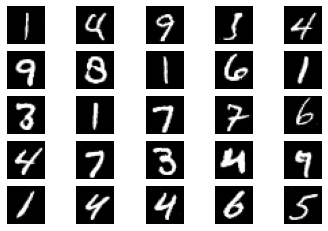

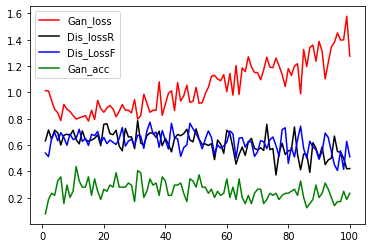

In [ ]:
train()

#### Experimentos

##### Generador 
Esta red compuesta por 4 capas se ajutó de la siguietne manera.
* Se modificó la dimension de salida de la capa densa aumentado o disminuyendo en potencias de 2 hasta dar con valor óptimo.
* Manteniendo fijo el valor anterior se procedio a cambiar los filtros de las capas intermedias dejando el número que generó los mejores resultados.
* Se adicionó en cada una de las etapas una capa LeakyReLU variando el valor de alpha dejando el valor con los resultados más óptimos.   


##### Discriminador
Esta red se inicializó con 3 capas convolucionales, un aplanamiento, un capa Dropout y capa densa de salida. las modificaciónes para su ajuste fueron:
* Se dejaron fijos los valores de la primera y tercera capa convolucional, variendo la cantidad de filtros de la capa intermedia y observando los resultados se dejó el valor de 256.
* A la capa Dropout se modificó su valor `rate` hasta llegar a un valor óptimo.
* Seguido de cada capa convolucional se aplicó la capa LeakyReLU  con los parámetros encontrados en el genrador.

#### Optimizador
Para encontrar el mejor optimizador se probaron todas las opciones disponibles en tensorflow quedando el optimizador Adam. seguidamente se procedio a modificar el learning rate, por último, con el valor encontrado anteriormente se busco el mejor valor para el parámetro beta_1. Este optimizador fue utilizado en ambas redes(Generador,Discriminador)

Todas las modificaciones realizadas se hicieron con un lote de 64 y 100 epocas.


#### Resultados

Después de entrenar la red con los mejores parámetros posibles se muestran los datos generadoss, para ello se crea un ruido con 9 muestras y una dimensión de 100. Adicionalmente se guardan los modelos para usos futuros.

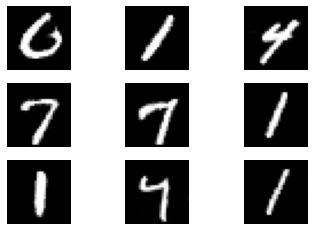

In [ ]:
noise = tf.random.normal([9, 100])   
gen_imgs=g_model.predict(noise)
gen_imgs = gen_imgs*0.5+0.5
fig, axs = plt.subplots(3, 3)
cnt = 0
for i in range(3):
    for j in range(3):
        axs[i,j].imshow(gen_imgs[cnt, :,:,0],cmap='gray')
        axs[i,j].axis('off')
        cnt += 1
plt.show()

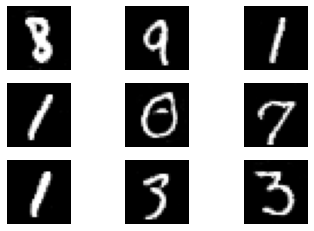

In [ ]:
noise = tf.random.normal([9, 100])   
gen_imgs=g_model.predict(noise)
gen_imgs = gen_imgs*0.5+0.5
fig, axs = plt.subplots(3, 3)
cnt = 0
for i in range(3):
    for j in range(3):
        axs[i,j].imshow(gen_imgs[cnt, :,:,0],cmap='gray')
        axs[i,j].axis('off')
        cnt += 1
plt.show()

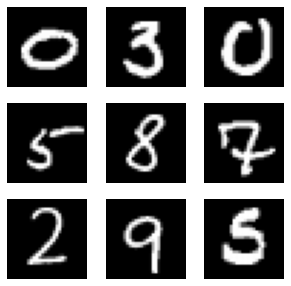

In [ ]:
ima= X[randint(0, X.shape[0],9)]
fig = plt.figure(figsize=(5,5))
for i in range(ima.shape[0]):
    plt.subplot(3, 3, i+1)
    plt.imshow(ima[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
    plt.axis('off')
#plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
plt.show()

In [ ]:
g_model.save('/content/drive/My Drive/Nacional/Decimo_Semestre/GAN/G_model.h5')
d_model.save('/content/drive/My Drive/Nacional/Decimo_Semestre/GAN/D_model.h5')
gan_model.save('/content/drive/My Drive/Nacional/Decimo_Semestre/GAN/GAN_model.h5')

### CIFAR-10

El conjunto de datos CIFAR-10 consta de de 60.000 imagenes en color de 32x32x3 correspondientes a 10 clases, cuenta 6.000 imagens por cada clase. Este conjunto de datos cuenta con 50.000 imagenes dedicadas a entrenamiento y 1.000 a evaluación.
A continuación se normalizan los datos y se inicializan todas las variables.

In [ ]:
(train, y), (_, _) = tf.keras.datasets.cifar10.load_data()
ix=list(np.where(y==7)[0])#list(np.where(y==3)[0])+list(np.where(y==7)[0])+list(np.where(y==2)[0])
X=train.astype('float32')
X=(X-127.5)/127.5
dataset=X[ix]
noise_dim=100
in_shape=(32,32,3) 
Num_Example=25
seed=tf.random.normal([Num_Example, noise_dim]) 
n_batch=16
L=tf.keras.regularizers.L1L2(1e-5,1e-5)
n_epochs=60
L1=tf.keras.regularizers.L2(1e-7)
C=tf.keras.initializers.GlorotNormal() #initializers.RandomNormal(stddev=0.02)

170500096/170498071 [==============================] - 2s 0us/step


####Generador
A diferencia del modelo anterior esta red combierte el ruido en una imagen de dimensiones 32x32x3. Para lograr obtener buenos resultados se adicionó una capa adicionl, el modelo y su estructura se muestran a continuación. 


In [ ]:
I=tf.keras.initializers.orthogonal()
def define_generator():
    model = Sequential()
    n_nodes =2048*4*4
    model.add(Dense(n_nodes, input_dim=noise_dim,kernel_initializer=C,kernel_regularizer=L))
    model.add(Dropout(0.5))
    model.add(Reshape((4,4,2048)))
    model.add(LeakyReLU(alpha=0.2))
        
    model.add(Conv2DTranspose(512,3,2,padding='same',kernel_initializer=C,kernel_regularizer=L))
    model.add(LeakyReLU(alpha=0.2))
    
    model.add(Conv2DTranspose(512,3,2,padding='same',kernel_initializer=C,kernel_regularizer=L))
    model.add(LeakyReLU(alpha=0.2))
    
    model.add(Conv2DTranspose(128,3,2,padding='same',kernel_initializer=C,kernel_regularizer=L))
    model.add(LeakyReLU(alpha=0.2))
    
    model.add(Conv2DTranspose(3,3,1,activation='tanh', padding='same'))
    return model
g_model=define_generator()
g_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32768)             3309568   
_________________________________________________________________
dropout (Dropout)            (None, 32768)             0         
_________________________________________________________________
reshape (Reshape)            (None, 4, 4, 2048)        0         
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 4, 4, 2048)        0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 8, 8, 512)         9437696   
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 8, 8, 512)         0         
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 16, 16, 512)       2

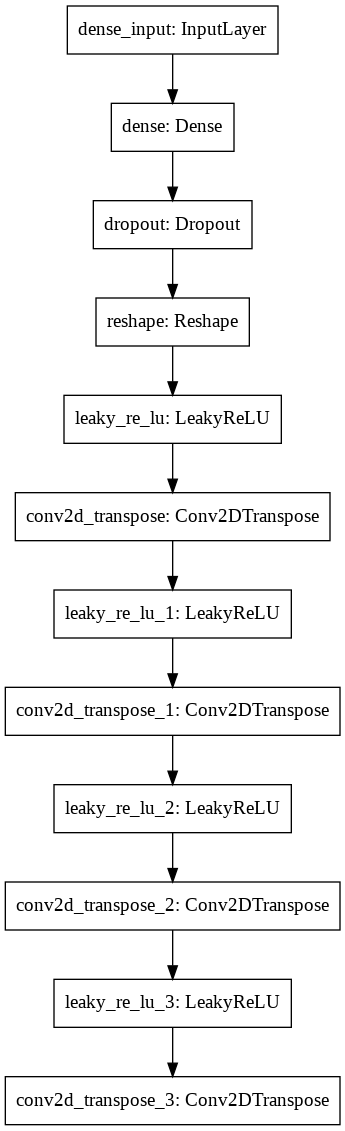

In [ ]:
tf.keras.utils.plot_model(g_model)

#### Discriminador
Para este modelo se obtó al igual que en el generador el incrementar el número de capas convolucionales con respecto al discriminador del anterior ejemplo. Esta red recibe imagenes 32x32x3 y nos entrega  su respectiva clasificación. La estructura y el modelo se observan acontinuación.

In [ ]:
def define_discriminator():
    model = Sequential()

    model.add(Conv2D(256,3,padding='same',input_shape=in_shape,kernel_initializer=C,kernel_regularizer=L))
    model.add(Conv2D(256,3,padding='same',kernel_initializer=C,kernel_regularizer=L))
    model.add(MaxPooling2D(pool_size=2,strides=2,padding='valid'))
    model.add(LeakyReLU(alpha=0.2))

    model.add(Conv2D(512,3,padding='same',kernel_initializer=C,kernel_regularizer=L))
    model.add(Conv2D(512,3,padding='same',kernel_initializer=C,kernel_regularizer=L))
    model.add(MaxPooling2D(pool_size=2,strides=2,padding='valid'))
    model.add(LeakyReLU(alpha=0.2))
    
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1, activation='sigmoid'))
    
    opt = Adam(lr=0.0002, beta_1=0.5)
    model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=opt, metrics=['accuracy'])
    
    return model
d_model=define_discriminator()
d_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 256)       7168      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 256)       590080    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 256)       0         
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 16, 16, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 512)       1180160   
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 512)       2359808   
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 512)        

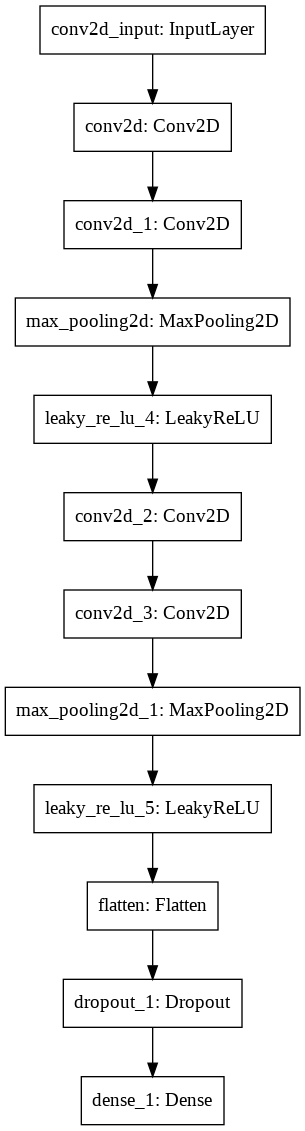

In [ ]:
tf.keras.utils.plot_model(d_model)

#### GAN
Este modelo es identico al mirado en el anterior modelo, cambiando unicamente en la función de perdida, la cual es `tf.keras.losses.KLDivergence()` 

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 32, 32, 3)         15700483  
_________________________________________________________________
sequential_1 (Sequential)    (None, 1)                 4169985   
Total params: 19,870,468
Trainable params: 15,700,483
Non-trainable params: 4,169,985
_________________________________________________________________


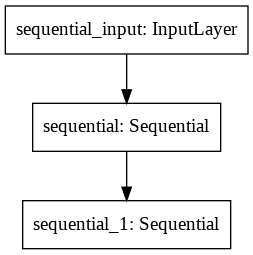

In [ ]:
def define_gan():
    d_model.trainable = False
    model = Sequential()
    model.add(g_model)
    model.add(d_model)
    opt = Adam(lr=0.0002, beta_1=0.5)
    model.compile(loss=tf.keras.losses.KLDivergence(), optimizer=opt,metrics=['accuracy'])
    return model
gan_model=define_gan()
gan_model.summary()
tf.keras.utils.plot_model(gan_model)

#### Función de entrenamiento
La única diferencia con respecto a la función utilizada en la base de datos MNIST es que se cambia  la sección:


```
cnt = 0
for i in range(5):
    for j in range(5):
        axs[i,j].imshow(gen_imgs[cnt, :,:,0], cmap='gray')
        axs[i,j].axis('off')
        cnt += 1
plt.show()
```
Por


```
cnt = 0
for i in range(5):
    for j in range(5):
        axs[i,j].imshow(gen_imgs[cnt, :,:,:])
        axs[i,j].axis('off')
        cnt += 1
plt.show()
```





In [ ]:
def train():
    bat_per_epo = int(dataset.shape[0] / n_batch)
    half_batch = int(n_batch / 2)
    Loss_R=[]
    Loss_F=[]
    Acc=[]
    gen_lossA=[]  
    for C in range(n_epochs): 
        start=time.time()
        for D in range(bat_per_epo):
            X_real, y_real = generate_real_samples(dataset, half_batch)
            d_loss1, _ = d_model.train_on_batch(X_real, y_real)
            X_fake, y_fake = generate_fake_samples(g_model, noise_dim, half_batch)
            d_loss2, _ = d_model.train_on_batch(X_fake, y_fake)
            X_gan = generate_latent_points(noise_dim, n_batch)
            y_gan = ones((n_batch, 1))
            g_loss,acc = gan_model.train_on_batch(X_gan, y_gan)
        display.clear_output(wait=True)
        print ('Epoca {}/{} tiempo total:{}'.format(C + 1,n_epochs, time.time()-start))  
        gen_imgs=g_model.predict(seed)
        gen_imgs=gen_imgs*0.5+0.5
        fig, axs = plt.subplots(5, 5)
        cnt = 0
        for i in range(5):
            for j in range(5):
                axs[i,j].imshow(gen_imgs[cnt, :,:,:])
                axs[i,j].axis('off')
                cnt += 1
        plt.show()
        gen_lossA.append(g_loss)
        Loss_R.append(d_loss1)
        Loss_F.append(d_loss2)
        Acc.append(acc)
        plt.plot(np.array(range(1,np.array(gen_lossA).shape[0]+1)),gen_lossA,'r',np.array(range(1,np.array(Loss_R).shape[0]+1)),Loss_R,'k',
                 np.array(range(1,np.array(Loss_F).shape[0]+1)),Loss_F,'b',np.array(range(1,np.array(Acc).shape[0]+1)),Acc,'g')
        plt.legend(['Gan_loss','Dis_lossR','Dis_LossF','Gan_acc'])
        plt.ylim([0,5])
        plt.show()
        g_model.save('/content/drive/My Drive/Nacional/Decimo_Semestre/GAN/C10G_model.h5')
        d_model.save('/content/drive/My Drive/Nacional/Decimo_Semestre/GAN/C10D_model.h5')
        gan_model.save('/content/drive/My Drive/Nacional/Decimo_Semestre/GAN/C10GAN_model.h5')

Epoca 60/60 tiempo total:35.44013571739197


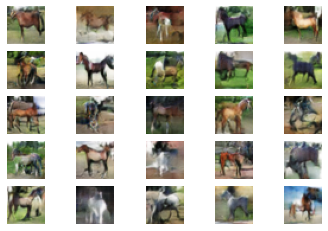

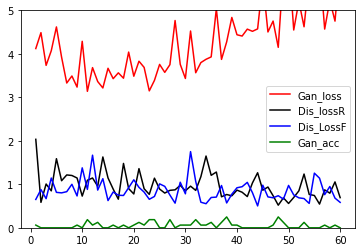

In [ ]:
train()

#### Experimentos


#### Resultados

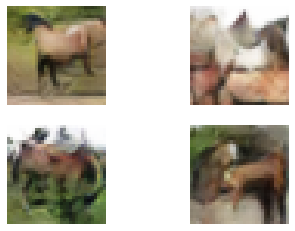

In [ ]:
noise = tf.random.normal([4, 100])   
gen_imgs=g_model.predict(noise)
gen_imgs=gen_imgs*0.5+0.5
fig, axs = plt.subplots(2, 2)
cnt = 0
for i in range(2):
    for j in range(2):
        axs[i,j].imshow(gen_imgs[cnt, :,:,:])
        axs[i,j].axis('off')
        cnt += 1
plt.show()

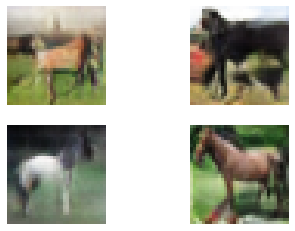

In [ ]:
noise = tf.random.normal([4, 100])   
gen_imgs=g_model.predict(noise)
gen_imgs=gen_imgs*0.5+0.5
fig, axs = plt.subplots(2, 2)
cnt = 0
for i in range(2):
    for j in range(2):
        axs[i,j].imshow(gen_imgs[cnt, :,:,:])
        axs[i,j].axis('off')
        cnt += 1
plt.show()

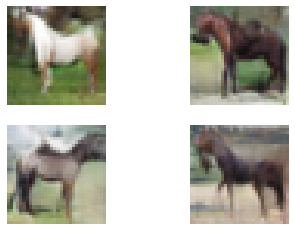

In [ ]:
noise = tf.random.normal([4, 100])   
gen_imgs=g_model.predict(noise)
gen_imgs=gen_imgs*0.5+0.5
fig, axs = plt.subplots(2, 2)
cnt = 0
for i in range(2):
    for j in range(2):
        axs[i,j].imshow(gen_imgs[cnt, :,:,:])
        axs[i,j].axis('off')
        cnt += 1
plt.show()

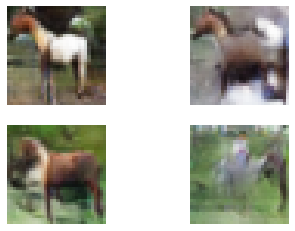

In [ ]:
noise = tf.random.normal([4, 100])   
gen_imgs=g_model.predict(noise)
gen_imgs=gen_imgs*0.5+0.5
fig, axs = plt.subplots(2, 2)
cnt = 0
for i in range(2):
    for j in range(2):
        axs[i,j].imshow(gen_imgs[cnt, :,:,:])
        axs[i,j].axis('off')
        cnt += 1
plt.show()

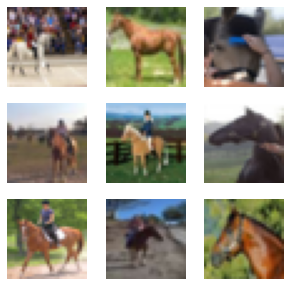

In [ ]:
ima= dataset[randint(0, dataset.shape[0],9)]
fig = plt.figure(figsize=(5,5))
for i in range(ima.shape[0]):
    plt.subplot(3, 3, i+1)
    plt.imshow(ima[i, :, :, :] * 0.5+0.5)
    plt.axis('off')
#plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
plt.show()

# Conditional GAN
En la sección anterior se pudo observar el funcionamiento de una GAN sobre dos bases de datos, el principal problema de la anterior implementación es que la generación de los datos es de forma aleatoria. Por ejemplo, en las 25 imagenes de la base MNIST podrían ser todas de un mismo número o nunca aparecer uno de los 10 dígitos presentes en la base de datos, es decir, no tenemos control sobre la creaación de los nuevos datos.


Con el fin de solventar este problema se recurre a utilizar una variante de las GANs. Las Conditional GANs(CGAN) son identicas a las GANs con la diferencia de que reciben la etiqueta de los datos o lotes de datos en cada red. Esto produce que los datos no se generen de forma aleatoria,nos permita controlar y guiar la salida para que genere un número determinado de datos correspondientes a cada clase. En consecuencia el discriminador duplica su trabajo debido a que ahora debe recibir la imagen,su etiqueta y clasificar los datos como reales o falsos.

La estructura de la CGAN es:


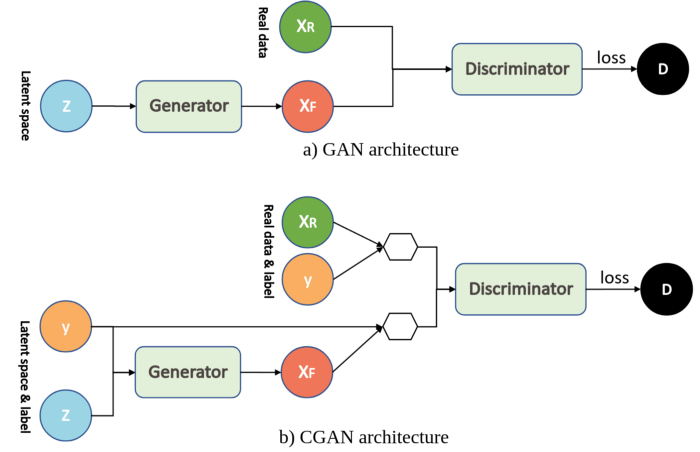

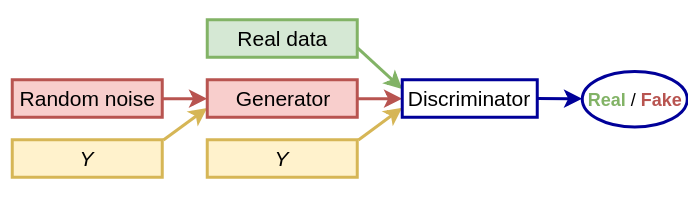
## Función de costo
\begin{equation}
 _{G}^{Min}\rightleftharpoons_{D}^{Max}= E_{x\sim PData(x)}log(D(x|y))+E_{z\sim P_{z}(z)}log(1-D(G(z|y))) 
\end{equation}
Siendo `y` la etiqueta de los datos.

## Implemntación
Como se observará a continuación la gran diferencia presente en este modelo es la adición de la etiqueta en cada una de las redes.

In [ ]:
(train, trainy), (vx, vy) = tf.keras.datasets.mnist.load_data()
train = train.reshape(train.shape[0], 28, 28, 1)
X=train.astype('float32')
X=(X-127.5)/127.5
dataset=[X,trainy]
noise_dim=100
in_shape=(28,28,1)
Num_Example=10
seed=tf.random.normal([Num_Example, noise_dim]) 
n_epochs=40
num_classes = np.unique(trainy).shape[0]
n_batch=64

Las funciones `generate_real_samples`,`generate_latent_points` y`generate_fake_samples` se modifican para que ahora sean capaces de entregar adicionalmente las etiquetas de los datos reales y de los datos generados.

In [ ]:
def generate_real_samples(dataset, n_samples):
	images, labels = dataset
	ix = randint(0, images.shape[0], n_samples)
	X, labels = images[ix], labels[ix]
	y = ones((n_samples, 1))
	return [X, labels], y
 
def generate_latent_points(latent_dim, n_samples, labels, n_classes=10):
	x_input = randn(latent_dim * n_samples)
	z_input = x_input.reshape(n_samples, latent_dim)
	return [z_input, labels]
 
def generate_fake_samples(generator, latent_dim, n_samples,labels):
	z_input, labels_input = generate_latent_points(latent_dim, n_samples,labels)
	images = generator.predict([labels_input,z_input])
	y = zeros((n_samples, 1))
	return [images, labels_input], y

### Diseño del modelo
Como se puede observar las redes del generador, discriminador y GAN ahora poseen una nueva entrada llamada `label` la cual posee la etiqueta de los datos. Esta variable es concatenada con el ruido para el caso del generador y con una imagen en el caso del discriminador. las redes en los tres casos despues de la concatenación es la misma que se utilizó en el apartado de las GAN. 

In [ ]:
def define_generator():               
    label = Input(shape = (1, ))
    embed_gen = Embedding(10, 50)(label)
    dense_layer_gen = Dense(7*7*256)(embed_gen)
    reshaped_dense_gen = Reshape((7, 7, 256))(dense_layer_gen)
    noise = Input(shape = (noise_dim,))
    dense1 = Dense(7*7*256)(noise)
    reshaped_dense_gen1=Reshape((7, 7, 256))(dense1)
    concat_layer_gen = Concatenate()([reshaped_dense_gen, reshaped_dense_gen1])
    L1=LeakyReLU(alpha=0.2)(concat_layer_gen)
    C1=Conv2DTranspose(256, (4,4), strides=(2,2), padding='same')(L1)
    L2=LeakyReLU(alpha=0.2)(C1)
    C3=Conv2DTranspose(256, (4,4), strides=(2,2), padding='same')(L2)
    L3=LeakyReLU(alpha=0.2)(C3)
    C4=Conv2D(1, (7,7), activation='tanh', padding='same')(L3)
    model=Model([label, noise], C4)
    return model

In [ ]:
g_model=define_generator()
g_model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 1, 50)        500         input_1[0][0]                    
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 100)]        0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 1, 12544)     639744      embedding[0][0]                  
_______________________________________________________________________________________

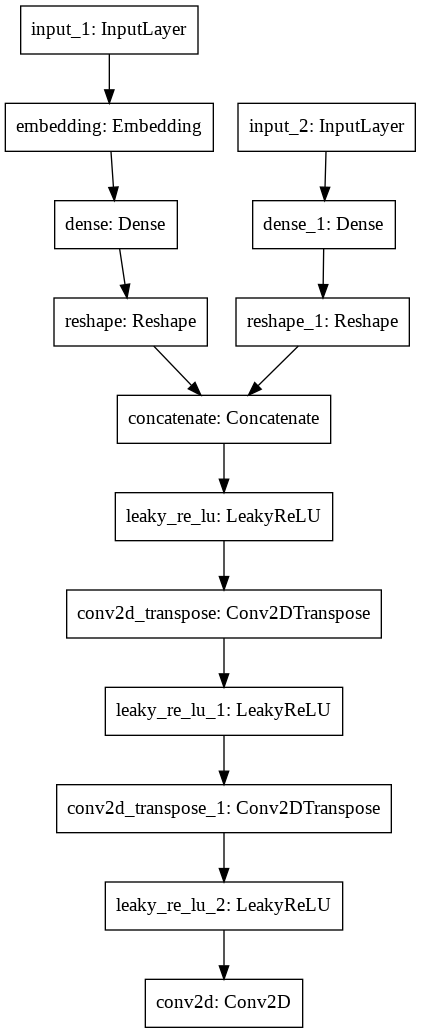

In [ ]:
tf.keras.utils.plot_model(g_model)

In [ ]:
def define_discriminator():        
    label = Input(shape = (1, ))
    embed = Embedding(10, 50)(label)
    dense_layer = Dense(28*28*1)(embed)
    reshaped_dense = Reshape((28,28,1))(dense_layer)
    input_disc = Input(shape = (28, 28, 1))   
    concat_layer = Concatenate()([input_disc, reshaped_dense])
    C1=Conv2D(64, (4,4),strides=(2,2), padding='same', input_shape=in_shape)(concat_layer)
    L1=LeakyReLU(alpha=0.2)(C1)
    C2=Conv2D(256, (4,4), strides=(2,2), padding='same')(L1)
    L2=LeakyReLU(alpha=0.2)(C2)
    C3=Conv2D(512, (4,4), strides=(2,2), padding='same')(L2)
    L3=LeakyReLU(alpha=0.2)(C3)
    F=Flatten()(L3)
    D=Dropout(0.4)(F)
    D1=Dense(1, activation='sigmoid')(D)
    model=Model([label,input_disc],D1)
    opt = Adam(lr=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

In [ ]:
d_model=define_discriminator()
d_model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 1, 50)        500         input_3[0][0]                    
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 1, 784)       39984       embedding_1[0][0]                
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 28, 28, 1)]  0                                            
_______________________________________________________________________________________

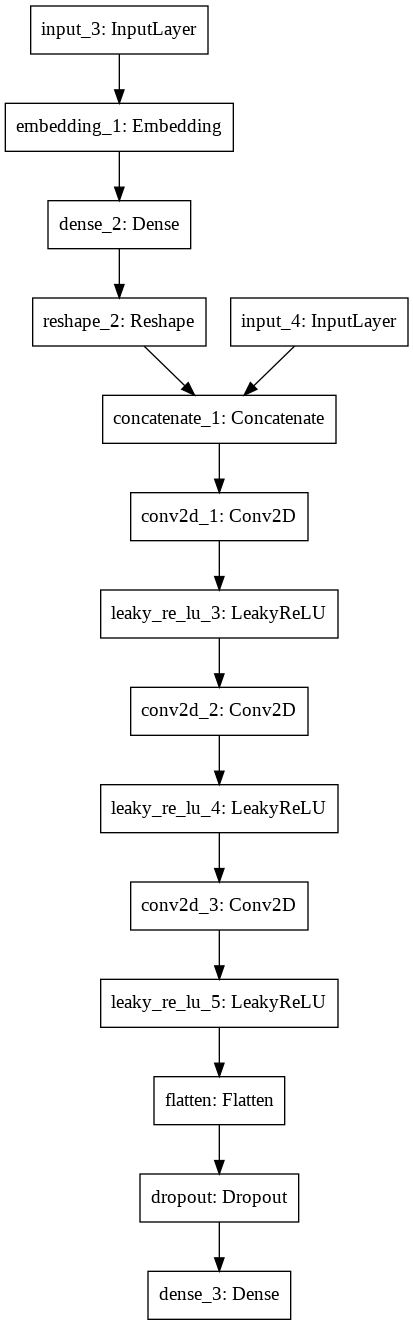

In [ ]:
tf.keras.utils.plot_model(d_model)

In [ ]:
def define_gan():
    inputs = Input(shape = (noise_dim,)) 
    label = Input(shape = (1,))
    gen_img = g_model([label, inputs])
    d_model.trainable = False
    outs = d_model([label, gen_img])
    comb_model = Model([label, inputs], outs)
    comb_model.compile(loss='binary_crossentropy', optimizer= Adam(0.0002, 0.5), metrics=['accuracy'])
    return comb_model

Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_5 (InputLayer)            [(None, 100)]        0                                            
__________________________________________________________________________________________________
functional_1 (Functional)       (None, 28, 28, 1)    5065973     input_6[0][0]                    
                                                                 input_5[0][0]                    
__________________________________________________________________________________________________
functional_3 (Functional)       (None, 1)            2410853     input_6[0][0]         

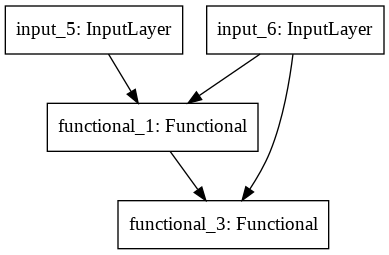

In [ ]:
gan_model=define_gan()
gan_model.summary()
tf.keras.utils.plot_model(gan_model)

En consecuencia al cambio en la estructura de la redes y de las funciones que nos ayudan en el entrenamiento es necesario realizar algunos cambios en la función `train`, quedando de la siguiente manera:

In [ ]:
def train():
    bat_per_epo = int(dataset[0].shape[0] / n_batch)
    half_batch = int(n_batch / 2)
    Loss_R=[]
    Loss_F=[]
    Acc=[]
    gen_lossA=[]  
    for C in range(n_epochs): 
        start=time.time()
        for D in range(bat_per_epo):
            [X_real, labels_real], y_real = generate_real_samples(dataset, half_batch)
            d_loss1, _ = d_model.train_on_batch([labels_real,X_real], y_real)
            [X_fake, labels], y_fake = generate_fake_samples(g_model,noise_dim , half_batch)
            d_loss2, _ = d_model.train_on_batch([labels,X_fake], y_fake)
            [z_input, labels_input] = generate_latent_points(noise_dim , n_batch)
            y_gan = ones((n_batch, 1))
            g_loss,acc = gan_model.train_on_batch([labels_input,z_input], y_gan)
        display.clear_output(wait=True)
        print ('Epoca {}/{} tiempo total:{}'.format(C + 1,n_epochs, time.time()-start))
        gen_imgs=[]
        for r in range(num_classes):  
            gen_imgs.append(g_model.predict([np.array([r]*Num_Example),seed]))
        gen_imgs=np.array(gen_imgs).reshape(num_classes*Num_Example,28,28,1)
        gen_imgs = gen_imgs*0.5+0.5
        fig, axs = plt.subplots(num_classes, Num_Example)
        cnt = 0
        for i in range(num_classes):
            for j in range(Num_Example):
                axs[i,j].imshow(gen_imgs[cnt, :,:,0], cmap='gray')
                axs[i,j].axis('off')
                cnt += 1
        plt.show()
        gen_lossA.append(g_loss)
        Loss_R.append(d_loss1)
        Loss_F.append(d_loss2)
        Acc.append(acc)
        plt.plot(np.array(range(1,np.array(gen_lossA).shape[0]+1)),gen_lossA,'r',np.array(range(1,np.array(Loss_R).shape[0]+1)),Loss_R,'k',
                 np.array(range(1,np.array(Loss_F).shape[0]+1)),Loss_F,'b',np.array(range(1,np.array(Acc).shape[0]+1)),Acc,'g')
        plt.legend(['Gan_loss','Dis_lossR','Dis_LossF','Gan_acc'])
        plt.ylim([0,3])
        plt.show()
        #g_model.save('/content/drive/My Drive/Nacional/Decimo_Semestre/GAN/CG_model.h5')
        #d_model.save('/content/drive/My Drive/Nacional/Decimo_Semestre/GAN/CD_model.h5')
        #gan_model.save('/content/drive/My Drive/Nacional/Decimo_Semestre/GAN/CGAN_model.h5')

Epoca 50/50 tiempo total:109.21141409873962


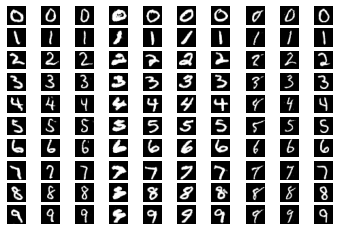

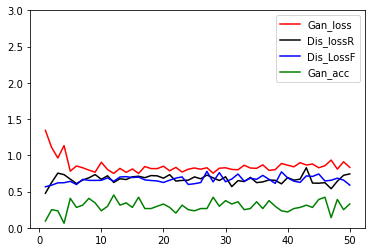

In [ ]:
train()

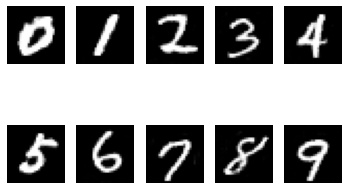

In [ ]:
noise = tf.random.normal([num_classes, 100])   
gen_imgs=g_model.predict([np.array([0,1,2,3,4,5,6,7,8,9]),noise])
gen_imgs = gen_imgs*0.5+0.5
fig, axs = plt.subplots(2, 5)
cnt = 0
for i in range(2):
    for j in range(5):
        axs[i,j].imshow(gen_imgs[cnt, :,:,0], cmap='gray')
        axs[i,j].axis('off')
        cnt += 1
plt.show()

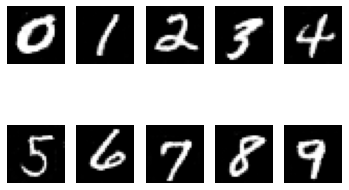

In [ ]:
noise = tf.random.normal([num_classes, 100])   
gen_imgs=g_model.predict([np.array([0,1,2,3,4,5,6,7,8,9]),noise])
gen_imgs = gen_imgs*0.5+0.5
fig, axs = plt.subplots(2, 5)
cnt = 0
for i in range(2):
    for j in range(5):
        axs[i,j].imshow(gen_imgs[cnt, :,:,0], cmap='gray')
        axs[i,j].axis('off')
        cnt += 1
plt.show()

# ClustrGAN

En las secciones anteriores se implementaron dos modelos de manera ilustrativa para comprender el funcionaminto de las redes adversas. El primer modelo creado pertenece a la categoria de aprendizaje no supervizado(GAN) y el segundo al aprendizaje supervizado(CGAN) ambos modelos mapean del esapcio latente al esapcio de los datos para generar muestras de alta fidelidad. Si bien se utiliza el espacio latente las redes adversas no están diseñadas para el agrupamiento.

Como el objetivo principal de este documento es realizar la detección de objetos sobre imagenes y video utilizando redes adversas debemos modificar las arquitecturas ya miradas anteriormente para utilizar el espacio latente como medio de agrupamiento. 

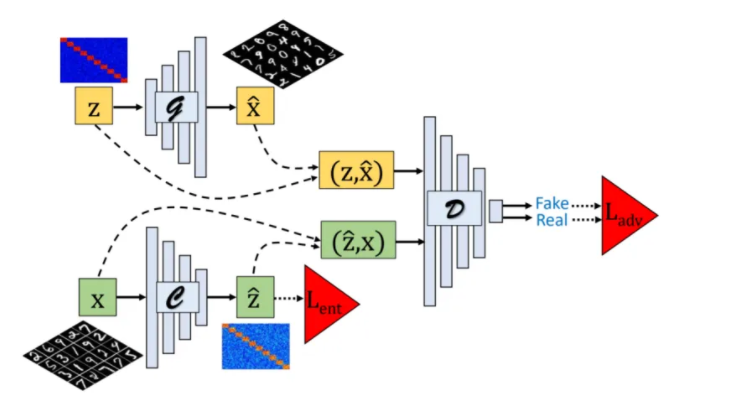

Como se puede observar en la figura la arquitectura de la clusterGAN es similar al primer modelo implementado en este documento con dos cambios importantes. El primero es que el discriminador ahora recibe los datos reales y los generados en conjunto con sus representaciones en el espacio latente, el segundo cambio importante es que adiciona una red encargada de codificar los datos reales, esta red es la encargada del agrupamiento de los datos(Red de agrupamiento). 

##Implementación



In [66]:
(train, trainy), (vx, vy) = tf.keras.datasets.mnist.load_data()
train = train.reshape(train.shape[0], 28, 28, 1)
X=train.astype('float32')
X=(X-127.5)/127.5
dataset=[X,trainy]
noise_dim=100
in_shape=(28,28,1)
Num_Example=25
seed=tf.random.normal([Num_Example, noise_dim])  
n_epochs=30
num_classes = np.unique(trainy).shape[0]
n_batch=128
C=tf.keras.initializers.GlorotNormal()

In [67]:
#g_model=tf.keras.models.load_model('/content/drive/My Drive/Nacional/Decimo_Semestre/GAN/ClusterG_model.h5')
#d_model=tf.keras.models.load_model('/content/drive/My Drive/Nacional/Decimo_Semestre/GAN/ClusterD_model.h5')
#z_model=tf.keras.models.load_model('/content/drive/My Drive/Nacional/Decimo_Semestre/GAN/z_model.h5')
#an_model=tf.keras.models.load_model('/content/drive/My Drive/Nacional/Decimo_Semestre/GAN/ClusterGAN_model.h5')
#cluster_model=tf.keras.models.load_model('/content/drive/My Drive/Nacional/Decimo_Semestre/GAN/Cluster_model.h5')


### Generador


In [68]:
L=tf.keras.regularizers.L1L2(1e-7,1e-7)
def define_generator():
    model = Sequential()
    n_nodes = 512 * 7 * 7
    model.add(Dense(n_nodes, input_dim=noise_dim,kernel_initializer=C,kernel_regularizer=L))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Reshape((7, 7, 512)))
    model.add(Conv2DTranspose(256, (4,4), strides=(2,2), padding='same',kernel_initializer=C,kernel_regularizer=L))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Conv2DTranspose(256, (4,4), strides=(2,2), padding='same',kernel_initializer=C,kernel_regularizer=L))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Conv2D(1, (7,7), activation='tanh', padding='same',kernel_initializer=C,kernel_regularizer=L))
    return model
g_model=define_generator()
g_model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_50 (Dense)             (None, 25088)             2533888   
_________________________________________________________________
leaky_re_lu_30 (LeakyReLU)   (None, 25088)             0         
_________________________________________________________________
reshape_5 (Reshape)          (None, 7, 7, 512)         0         
_________________________________________________________________
conv2d_transpose_10 (Conv2DT (None, 14, 14, 256)       2097408   
_________________________________________________________________
leaky_re_lu_31 (LeakyReLU)   (None, 14, 14, 256)       0         
_________________________________________________________________
conv2d_transpose_11 (Conv2DT (None, 28, 28, 256)       1048832   
_________________________________________________________________
leaky_re_lu_32 (LeakyReLU)   (None, 28, 28, 256)     

In [69]:
L=tf.keras.regularizers.L1L2(1e-3,1e-3)
def define_discriminator():        
    label = Input(shape = (noise_dim, ))
    #embed = Embedding(10, 50)(label)
    dense_layer = Dense(512,activation='elu',kernel_regularizer=L,kernel_initializer=C)(label)
    dense_layer_1 = Dense(512,activation='elu',kernel_regularizer=L,kernel_initializer=C)(dense_layer)
    dense_layer_2 = Dense(256,activation='elu',kernel_regularizer=L,kernel_initializer=C)(dense_layer_1)
    dense_layer_3 = Dense(100,activation='sigmoid',kernel_regularizer=L,kernel_initializer=C)(dense_layer_2)
    input_disc = Input(shape = (28, 28, 1))   
    C1=Conv2D(64, (4,4),strides=(2,2), padding='same', input_shape=in_shape)(input_disc)
    L1=LeakyReLU(alpha=0.2)(C1)
    C2=Conv2D(256, (4,4), strides=(2,2), padding='same')(L1)
    L2=LeakyReLU(alpha=0.2)(C2)
    C3=Conv2D(512, (4,4), strides=(2,2), padding='same')(L2)
    #reshaped_dense = Reshape((4,4,8))(dense_layer_3)
    L3=LeakyReLU(alpha=0.2)(C3)
    F=Flatten()(L3)
    concat_layer = Concatenate()([F,dense_layer_3])
    #F1=Dense(512)(F)
    D=Dropout(0.1)(concat_layer)
    D1=Dense(1, activation='sigmoid')(D)
    model=Model([label,input_disc],D1)
    opt = Adam(lr=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model
d_model=define_discriminator()
d_model.summary()

Model: "functional_33"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_23 (InputLayer)           [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_31 (Conv2D)              (None, 14, 14, 64)   1088        input_23[0][0]                   
__________________________________________________________________________________________________
leaky_re_lu_33 (LeakyReLU)      (None, 14, 14, 64)   0           conv2d_31[0][0]                  
__________________________________________________________________________________________________
conv2d_32 (Conv2D)              (None, 7, 7, 256)    262400      leaky_re_lu_33[0][0]             
______________________________________________________________________________________

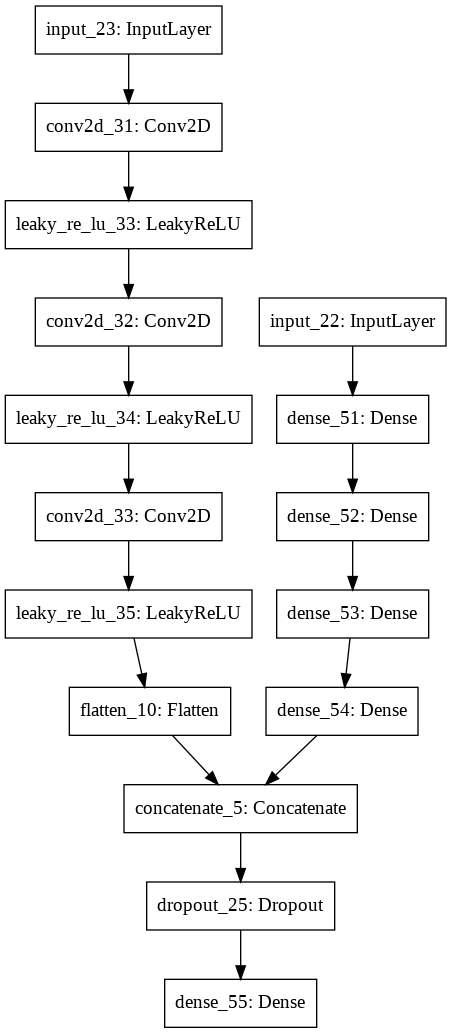

In [70]:
tf.keras.utils.plot_model(d_model)

In [71]:
in_shape[2]

1

In [72]:
L=tf.keras.regularizers.L1L2(1e-12,1e-12)
def Z_Latente():
    model = Sequential()
    model.add(Conv2D(128,3,padding='same',activation='tanh',kernel_regularizer=L,kernel_initializer=C,input_shape=in_shape))
    model.add(MaxPooling2D(2,padding='same'))
    model.add(Conv2D(64,3,padding='same',activation='tanh',kernel_regularizer=L,kernel_initializer=C))
    model.add(MaxPooling2D(2,padding='same'))
    model.add(Flatten())
    model.add(Dropout(0.3))
    model.add(Dense(512,activation='tanh',kernel_regularizer=L,kernel_initializer=C))
    model.add(Dropout(0.3))
    model.add(Dense(256,activation='tanh',kernel_regularizer=L,kernel_initializer=C))
    model.add(Dropout(0.3))    
    model.add(Dense(128,activation='tanh',kernel_regularizer=L,kernel_initializer=C))
    model.add(Dropout(0.3))
    model.add(Dense(noise_dim,activation='sigmoid',kernel_regularizer=L,kernel_initializer=C))
    return model
z_model=Z_Latente()
z_model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_34 (Conv2D)           (None, 28, 28, 128)       1280      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 14, 14, 64)        73792     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 3136)              0         
_________________________________________________________________
dropout_26 (Dropout)         (None, 3136)              0         
_________________________________________________________________
dense_56 (Dense)             (None, 512)             

Model: "functional_35"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_24 (InputLayer)           [(None, 100)]        0                                            
__________________________________________________________________________________________________
sequential_10 (Sequential)      (None, 28, 28, 1)    5692673     input_24[0][0]                   
__________________________________________________________________________________________________
functional_33 (Functional)      (None, 1)            2840841     input_24[0][0]                   
                                                                 sequential_10[0][0]              
Total params: 8,533,514
Trainable params: 5,692,673
Non-trainable params: 2,840,841
__________________________________________________________________________________________________


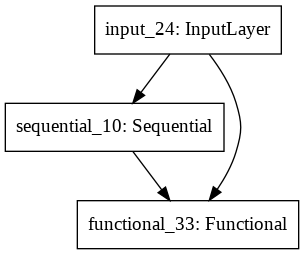

In [73]:
def define_gan():
    inputs = Input(shape = (noise_dim,)) 
    gen_img = g_model(inputs)
    d_model.trainable = False
    outs = d_model([inputs, gen_img])
    comb_model = Model( inputs, outs)
    comb_model.compile(loss='binary_crossentropy', optimizer= Adam(0.0002, 0.5), metrics=['accuracy'])
    return comb_model
gan_model=define_gan()
gan_model.summary()
tf.keras.utils.plot_model(gan_model)

Model: "functional_37"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_25 (InputLayer)           [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
sequential_11 (Sequential)      (None, 100)          1858340     input_25[0][0]                   
__________________________________________________________________________________________________
functional_33 (Functional)      (None, 1)            2840841     sequential_11[0][0]              
                                                                 input_25[0][0]                   
Total params: 4,699,181
Trainable params: 1,858,340
Non-trainable params: 2,840,841
__________________________________________________________________________________________________


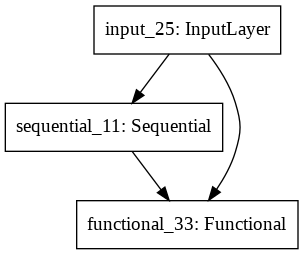

In [74]:
C1=tf.keras.losses.CosineSimilarity(-1)
def define_cluster():
    label = Input(shape =in_shape )
    noise= z_model(label)
    d_model.trainable = False
    outs = d_model([noise, label])
    comb_model = Model(label, outs)
    comb_model.compile(loss=C1, optimizer= Adam(0.0002, 0.5), metrics=['accuracy'])
    return comb_model
cluster_model=define_cluster()
cluster_model.summary()
tf.keras.utils.plot_model(cluster_model)

In [75]:
def generate_real_samples(dataset, n_samples,z_model):
    images, labels = dataset
    ix = randint(0, images.shape[0], n_samples)
    X, labels = images[ix], labels[ix]
    z_real=z_model.predict(X)
    y = ones((n_samples, 1))
    return [X, z_real], y
 
def generate_latent_points(latent_dim, n_samples, n_classes=10):
    x_input = randn(latent_dim * n_samples)
    z_input = x_input.reshape(n_samples, latent_dim)
    return z_input
 
def generate_fake_samples(generator, latent_dim, n_samples):
    z_input = generate_latent_points(latent_dim, n_samples)
    images = generator.predict(z_input)
    y = zeros((n_samples, 1))
    return [images, z_input], y

In [76]:
def train():
    bat_per_epo = int(dataset[0].shape[0] / n_batch)
    half_batch = int(n_batch / 2)
    Loss_R=[]
    Loss_F=[]
    Acc=[]
    Zgan=[]
    Zacc=[]
    gen_lossA=[]  
    for C in range(n_epochs): 
        start=time.time()
        for D in range(bat_per_epo):
            [X_real, z_real], y_real = generate_real_samples(dataset, half_batch,z_model)
            d_loss1, _ = d_model.train_on_batch([z_real,X_real], y_real)
            [X_fake, z_fake], y_fake = generate_fake_samples(g_model,noise_dim , half_batch)
            d_loss2, _ = d_model.train_on_batch([z_fake,X_fake], y_fake)
            z_input = generate_latent_points(noise_dim , n_batch)
            y_gan = ones((n_batch, 1))
            g_loss,acc = gan_model.train_on_batch(z_input, y_gan)
            X=dataset[0][randint(0, dataset[0].shape[0], n_batch)]
            z_loss,z_acc = cluster_model.train_on_batch(X, y_gan)
        display.clear_output(wait=True)
        print ('Epoca {}/{} tiempo total:{}'.format(C + 1,n_epochs, time.time()-start))  
        gen_imgs=g_model.predict(seed)
        gen_imgs = gen_imgs*0.5+0.5
        fig, axs = plt.subplots(5, 5)
        cnt = 0
        for i in range(5):
            for j in range(5):
                axs[i,j].imshow(gen_imgs[cnt, :,:,0], cmap='gray')
                axs[i,j].axis('off')
                cnt += 1
        plt.show()
        gen_lossA.append(g_loss)
        Loss_R.append(d_loss1)
        Loss_F.append(d_loss2)
        Acc.append(acc)
        Zgan.append(z_loss)
        Zacc.append(z_acc)
        plt.plot(np.array(range(1,np.array(gen_lossA).shape[0]+1)),gen_lossA,'r',np.array(range(1,np.array(Loss_R).shape[0]+1)),Loss_R,'k',
                 np.array(range(1,np.array(Loss_F).shape[0]+1)),Loss_F,'b',np.array(range(1,np.array(Acc).shape[0]+1)),Acc,'g')
        plt.legend(['Gan_loss','Dis_lossR','Dis_LossF','Gan_acc'])
        plt.ylim([0,3])
        plt.show()
        plt.plot(np.array(range(1,np.array(Zgan).shape[0]+1)),Zgan,'r',np.array(range(1,np.array(Zacc).shape[0]+1)),Zacc,'g')
        plt.legend(['cluster_Gan','cluster_Acc'])
        plt.show()
        #g_model.save('/content/drive/My Drive/Nacional/Decimo_Semestre/GAN/ClusterG_model.h5')
        #d_model.save('/content/drive/My Drive/Nacional/Decimo_Semestre/GAN/ClusterD_model.h5')
        #gan_model.save('/content/drive/My Drive/Nacional/Decimo_Semestre/GAN/ClusterGAN_model.h5')
        #cluster_model.save('/content/drive/My Drive/Nacional/Decimo_Semestre/GAN/Cluster_model.h5')
        #z_model.save('/content/drive/My Drive/Nacional/Decimo_Semestre/GAN/z_model.h5')

## Epoca 240



Epoca 5/30 tiempo total:109.01745128631592


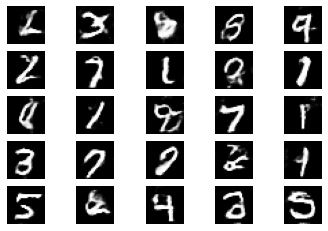

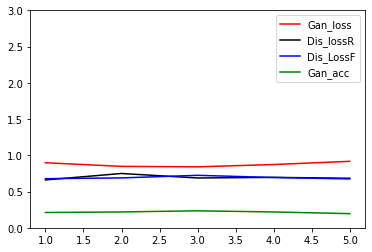

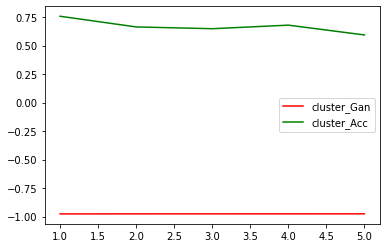

KeyboardInterrupt: ignored

In [77]:
train()

In [ ]:
Xv=vx.astype('float32')
Xv=(Xv-127.5)/127.5
Xv= Xv.reshape(Xv.shape[0], 28, 28, 1)
vy_e=z_model.predict(Xv)
X = vy_e
y = vy
tsne = TSNE(n_components=2, random_state=0)
X_2d = tsne.fit_transform(X)
target_ids = range(10)
plt.figure(figsize=(6, 5))
colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'brown', 'orange', 'gray'
for i, c, label in zip(target_ids, colors, target_ids):
    plt.scatter(X_2d[y == i, 0], X_2d[y == i, 1], c=c, label=label)
plt.legend()
plt.show()

## Epoca 0

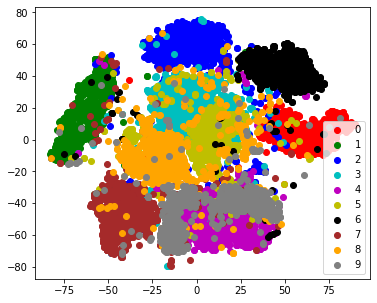

In [ ]:
X = vy_e
y = vy
tsne = TSNE(n_components=2, random_state=0)
X_2d = tsne.fit_transform(X)
target_ids = range(10)
plt.figure(figsize=(6, 5))
colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'brown', 'orange', 'gray'
for i, c, label in zip(target_ids, colors, target_ids):
    plt.scatter(X_2d[y == i, 0], X_2d[y == i, 1], c=c, label=label)
plt.legend()
plt.show()

## Epoca 120


Epoca 120/120 tiempo total:71.42679476737976


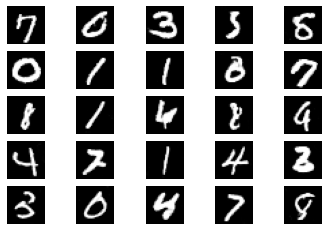

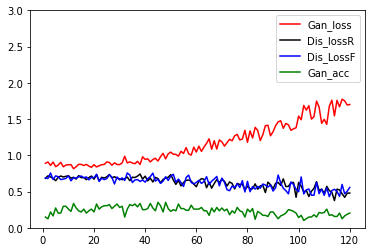

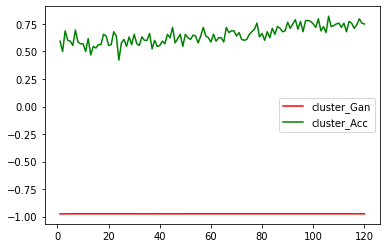

In [ ]:
train()

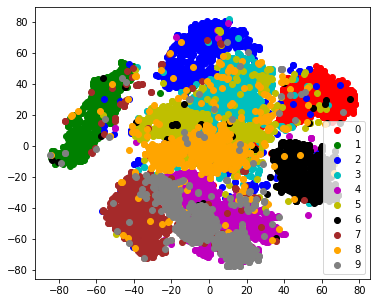

In [ ]:
Xv=vx.astype('float32')
Xv=(Xv-127.5)/127.5
Xv= Xv.reshape(Xv.shape[0], 28, 28, 1)
vy_e=z_model.predict(Xv)
X = vy_e
y = vy
tsne = TSNE(n_components=2, random_state=0)
X_2d = tsne.fit_transform(X)
target_ids = range(10)
plt.figure(figsize=(6, 5))
colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'brown', 'orange', 'gray'
for i, c, label in zip(target_ids, colors, target_ids):
    plt.scatter(X_2d[y == i, 0], X_2d[y == i, 1], c=c, label=label)
plt.legend()
plt.show()

## Datos Originales TSNE

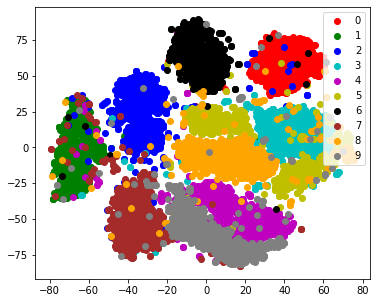

In [ ]:
X = Xv.reshape(Xv.shape[0], 28*28)
y = vy
tsne = TSNE(n_components=2, random_state=0)
X_2d = tsne.fit_transform(X)
target_ids = range(10)
plt.figure(figsize=(6, 5))
colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'brown', 'orange', 'gray'
for i, c, label in zip(target_ids, colors, target_ids):
    plt.scatter(X_2d[y == i, 0], X_2d[y == i, 1], c=c, label=label)
plt.legend()
plt.show()



```
function ClickConnect(){
console.log("Working"); 
document
  .querySelector('#top-toolbar > colab-connect-button')
  .shadowRoot.querySelector('#connect')
  .click() 
}
setInterval(ClickConnect,60000)
```



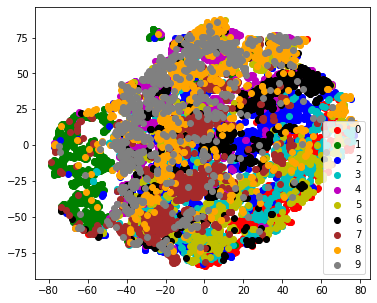

In [ ]:
z= tf.keras.models.load_model('/content/drive/My Drive/Nacional/Decimo_Semestre/GAN/z_model.h5')
Xv=vx.astype('float32')
Xv=(Xv-127.5)/127.5
Xv= Xv.reshape(Xv.shape[0], 28, 28, 1)
vy_e=z.predict(Xv)
X = vy_e
y = vy
tsne = TSNE(n_components=2, random_state=0)
X_2d = tsne.fit_transform(X)
target_ids = range(10)
plt.figure(figsize=(6, 5))
colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'brown', 'orange', 'gray'
for i, c, label in zip(target_ids, colors, target_ids):
    plt.scatter(X_2d[y == i, 0], X_2d[y == i, 1], c=c, label=label)
plt.legend()
plt.show()